Name : Rishabh Rathi

Registeration Number : 20BCE10372

Task:

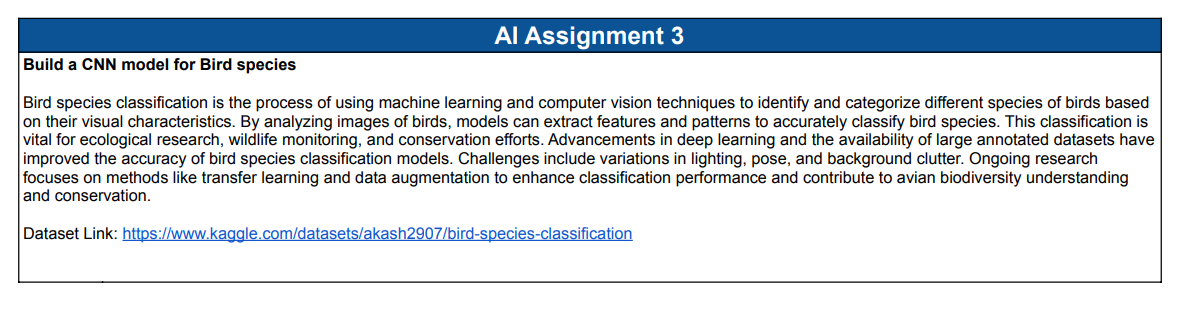

In [1]:
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_da

Unzipping done

Data Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(
    rescale = (1./255),
    horizontal_flip = True,
    shear_range = 0.2
)

test_gen = ImageDataGenerator(
    rescale = (1./255)
)

In [4]:
train = train_gen.flow_from_directory(
    '/content/train_data/train_data',
    target_size = (90, 90),
    class_mode = 'categorical',
    batch_size = 15
)

test = test_gen.flow_from_directory(
    '/content/test_data/test_data',
    target_size = (90, 90),
    class_mode = 'categorical',
    batch_size = 15
)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [5]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Flatten, Convolution2D, Dense

from tensorflow.keras.layers import BatchNormalization, Dropout

In [7]:
model = Sequential()

# Layer 1 (Convolution)
model.add(
    Convolution2D(
        30,
        (3, 3),
        activation='relu',
        input_shape=(90, 90, 3)
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2)
    )
)

model.add(Dropout(0.05))

# Layer 3 (Flatten)
model.add(
    Flatten()
)

# Layer 4 (Dense)

model.add(
    Dense(
        64,
        activation='relu'
    )
)

# Output
model.add(
    Dense(
        16,
        activation='softmax'
    )
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 30)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 44, 44, 30)        0         
                                                                 
 flatten (Flatten)           (None, 58080)             0         
                                                                 
 dense (Dense)               (None, 64)                3717184   
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',patience=5)

In [11]:
model.fit(
    train,
    batch_size=15,
    validation_data=test,
    epochs=30,
    callbacks=early_stop
)

Epoch 1/30
10/10 [==============================] - 102s 10s/step - loss: 5.5096 - accuracy: 0.1000 - val_loss: 2.8940 - val_accuracy: 0.1401
Epoch 2/30
10/10 [==============================] - 88s 9s/step - loss: 2.8507 - accuracy: 0.1800 - val_loss: 2.7294 - val_accuracy: 0.0892
Epoch 3/30
10/10 [==============================] - 85s 9s/step - loss: 2.5764 - accuracy: 0.1800 - val_loss: 2.6033 - val_accuracy: 0.1083
Epoch 4/30
10/10 [==============================] - 119s 13s/step - loss: 2.3940 - accuracy: 0.3133 - val_loss: 2.5966 - val_accuracy: 0.1401
Epoch 5/30
10/10 [==============================] - 85s 9s/step - loss: 2.3102 - accuracy: 0.2933 - val_loss: 2.6334 - val_accuracy: 0.1975
Epoch 6/30
10/10 [==============================] - 86s 9s/step - loss: 2.2097 - accuracy: 0.3133 - val_loss: 2.6349 - val_accuracy: 0.1656
Epoch 7/30
10/10 [==============================] - 85s 9s/step - loss: 1.9924 - accuracy: 0.4000 - val_loss: 2.6269 - val_accuracy: 0.1656
Epoch 8/30
10/10

In [12]:
model.save('birds - 20BCE10372.h5')

Testing

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

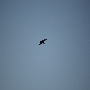

In [14]:
img = image.load_img('/content/test_data/test_data/indvul/DSC_1277.jpg', target_size=(90, 90))
img

In [15]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
res = model.predict(img)
index_of_res = np.argmax(res)

1/1 [==============================] - 0s 123ms/step


In [16]:
res_lookup = [
    'blasti',
    'bonegl',
    'brhkyt',
    'cbrtsh',
    'cmnmyn',
    'gretit',
    'hilpig',
    'himbul',
    'himgri',
    'hsparo',
    'indvul',
    'jglowl',
    'lbicrw',
    'mgprob',
    'rebimg',
    'wcrsrt'
]


In [17]:
res_lookup[index_of_res]

'indvul'